<a href="https://colab.research.google.com/github/MatheusHenriqueDaSilva/data_science/blob/main/projeto_porto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split

In [3]:
DATA = pd.read_csv('/content/train.csv')
DATA.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


In [4]:
def generate_metadata(dataframe):

    metadata2 = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata2=metadata2.sort_values(by='tipo')
    metadata2 = metadata2.reset_index(drop=True)

    return metadata2

metadados = generate_metadata(DATA)
metadados

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,id,int64,0,0.0,32559
1,ps_car_11,int64,0,0.0,4
2,ps_car_11_cat,int64,0,0.0,104
3,ps_car_10_cat,int64,0,0.0,3
4,ps_car_09_cat,int64,0,0.0,6
5,ps_car_08_cat,int64,0,0.0,2
6,ps_car_06_cat,int64,0,0.0,18
7,ps_car_05_cat,int64,0,0.0,3
8,ps_car_04_cat,int64,0,0.0,10
9,ps_car_03_cat,int64,0,0.0,3


In [5]:
data_fil = DATA.dropna()
metadados2 = generate_metadata(data_fil)
metadados2

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,id,int64,0,0.0,32558
1,ps_car_11,int64,0,0.0,4
2,ps_car_11_cat,int64,0,0.0,104
3,ps_car_10_cat,int64,0,0.0,3
4,ps_car_09_cat,int64,0,0.0,6
5,ps_car_08_cat,int64,0,0.0,2
6,ps_car_06_cat,int64,0,0.0,18
7,ps_car_05_cat,int64,0,0.0,3
8,ps_car_04_cat,int64,0,0.0,10
9,ps_car_03_cat,int64,0,0.0,3


In [6]:
lista_spec = ['id', 'target']
target = data_fil['target']
data_var = data_fil.drop(lista_spec,axis=1)

In [55]:
# Suponha que você queira separar 70% dos dados para treino e 30% para validação

X_train, X_test, y_train, y_test = train_test_split(data_var,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((22790, 57), (9768, 57), (22790,), (9768,))

In [11]:
# Substituindo -1 por 'missing' em todo o dataframe
# Criando um novo dataframe baseado no original
df_train_01 = X_train.copy()

df_train_01.replace(-1, np.nan, inplace=True)
metadados3 = generate_metadata(df_train_01)
metadados3

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,ps_ind_01,int64,0,0.00,8
1,ps_car_11,int64,0,0.00,4
2,ps_car_11_cat,int64,0,0.00,104
3,ps_car_10_cat,int64,0,0.00,3
4,ps_car_06_cat,int64,0,0.00,18
5,ps_car_04_cat,int64,0,0.00,10
6,ps_car_02_cat,int64,0,0.00,2
7,ps_ind_18_bin,int64,0,0.00,2
8,ps_ind_17_bin,int64,0,0.00,2
9,ps_ind_16_bin,int64,0,0.00,2


In [12]:
missing_cutoff = 67

drop_vars_nulos = metadados3[(metadados3['percent_nulos'] >= missing_cutoff)]
lista_drop_vars = list(drop_vars_nulos.nome_variavel.values)

print('Variáveis que serão excluídas por alto percentual de nulos: ',lista_drop_vars)
# retirando lista de variáveis com alto percentual de nulos
df_train_02 = df_train_01.drop(axis=1,columns=lista_drop_vars)


df_train_02 = df_train_01.drop(axis=1,columns=lista_drop_vars)
df_train_02.shape

Variáveis que serão excluídas por alto percentual de nulos:  ['ps_car_03_cat']


(22790, 56)

In [28]:
# Salvar a lista em um arquivo .pkl
with open('/content/prd_drop_nullvars_a014.pkl', 'wb') as f:
  pickle.dump(lista_drop_vars, f)

In [57]:
def pod_custom_fillna(df):
    # Substituindo -1 por nulos
    # Esta função serve para este modelo ou caso específico, porque pode ser que em outras situações o missing não venha marcado com -1

    df.replace(-1, np.nan, inplace=True)
    numerical_cols = df.select_dtypes(include=['float64', 'float32', 'int64', 'int32']).columns
    means = {}

    for col in numerical_cols:
        means[col] = df[col].mean()
        df[col].fillna(means[col], inplace=True)

    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna('missing')

    return df, means

df_train_03, means = pod_custom_fillna(df_train_02)

with open('/content/prd_fillna_a014.pkl', 'wb') as f:
  pickle.dump(means, f)
df_train_03.shape

(22790, 56)

In [32]:
with open('/content/prd_fillna_a014.pkl', 'rb') as f:
  loaded_means = pickle.load(f)
loaded_means

{'ps_ind_01': 1.892891619131198,
 'ps_ind_02_cat': 1.3530263793179125,
 'ps_ind_03': 4.401842913558578,
 'ps_ind_04_cat': 0.41821373710774634,
 'ps_ind_05_cat': 0.41733120680489094,
 'ps_ind_06_bin': 0.395129442738043,
 'ps_ind_07_bin': 0.2556823168056165,
 'ps_ind_08_bin': 0.16235190873189995,
 'ps_ind_09_bin': 0.18683633172444056,
 'ps_ind_10_bin': 0.000307152259763054,
 'ps_ind_11_bin': 0.002062308029837648,
 'ps_ind_12_bin': 0.009082931110136024,
 'ps_ind_13_bin': 0.0009653356735410268,
 'ps_ind_14': 0.012417727073277754,
 'ps_ind_15': 7.340149188240456,
 'ps_ind_16_bin': 0.6620008775778851,
 'ps_ind_17_bin': 0.12136902150065819,
 'ps_ind_18_bin': 0.15037297060114085,
 'ps_reg_01': 0.6108995173321633,
 'ps_reg_02': 0.4368714348398421,
 'ps_reg_03': 0.8925326248364815,
 'ps_car_01_cat': 8.301281488633371,
 'ps_car_02_cat': 0.8270732777534006,
 'ps_car_04_cat': 0.7282141290039491,
 'ps_car_05_cat': 0.526278126739286,
 'ps_car_06_cat': 6.589074155331286,
 'ps_car_07_cat': 0.9494259035

In [43]:
def pod_custom_fillna_prod(df, means):

    df.replace(-1, np.nan, inplace=True)
    for col, mean_value in means.items():
      df[col].fillna(mean_value, inplace=True)

    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna('missing')

    return df

test_prod = pod_custom_fillna_prod(X_test,loaded_means)
test_prod.shape


(9768, 57)

In [44]:
# retirando lista de variáveis com alto percentual de nulos
prod_2 = test_prod.drop(axis=1,columns=lista_drop_vars)

In [45]:
from sklearn.preprocessing import StandardScaler
# Instanciando o scaler
scaler = StandardScaler()

# Padronizando a base de treino
df_train_03_scaled = scaler.fit_transform(df_train_03)
df_train_04 = pd.DataFrame(df_train_03_scaled, columns=df_train_03.columns, index=df_train_03.index)

# Salva o scaler em um arquivo .pkl
with open('/content/prd_scaler_a014.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [46]:
# Carregar o scaler
with open('/content/prd_scaler_a014.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Suponha test_df como sua base de teste
test_df_scaled = loaded_scaler.transform(prod_2)
test_df = pd.DataFrame(test_df_scaled, columns=prod_2.columns, index=prod_2.index)
test_df.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
32066,1.568390,0.988245,-1.258780,1.179588,-0.309911,-0.808237,-0.586099,2.271444,-0.479338,-0.017528,...,0.237276,0.466643,-1.112881,-1.277953,2.666518,0.772405,-1.122105,-0.641547,-0.741636,-0.429978
10203,-0.450709,4.043223,0.961393,1.179588,-0.309911,-0.808237,1.706196,-0.440249,-0.479338,-0.017528,...,0.664040,0.466643,-0.517558,0.171877,-0.375021,-1.294658,-1.122105,-0.641547,1.348371,-0.429978
6395,0.054066,0.988245,-1.628809,-0.847940,-0.309911,-0.808237,-0.586099,-0.440249,2.086211,-0.017528,...,-0.189488,-0.364590,0.077766,0.171877,-0.375021,0.772405,-1.122105,-0.641547,1.348371,-0.429978
5665,2.073165,-0.539244,0.221335,1.179588,-0.309911,-0.808237,-0.586099,2.271444,-0.479338,-0.017528,...,0.237276,-1.195824,-1.112881,-1.277953,-0.375021,0.772405,0.891182,1.558732,-0.741636,-0.429978
27419,2.073165,2.515734,-0.148693,1.179588,1.917897,-0.808237,-0.586099,2.271444,-0.479338,-0.017528,...,0.237276,-1.195824,1.268412,-0.553038,2.666518,0.772405,-1.122105,-0.641547,-0.741636,-0.429978


In [47]:
from sklearn.ensemble import RandomForestClassifier

X = df_train_04
y = y_train

clf = RandomForestClassifier() # troque aqui qual classificador quer utilizar: GradientBoostingClassifier, DecisionTreeClassifier
clf.fit(X, y)

# Obter importância das variáveis
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)
features

,Feature,Importance
20,ps_reg_03,0.053857
33,ps_car_13,0.053499
34,ps_car_14,0.044398
49,ps_calc_14,0.036706
45,ps_calc_10,0.034702
30,ps_car_11_cat,0.033415
14,ps_ind_15,0.033206
46,ps_calc_11,0.032559
19,ps_reg_02,0.030960
2,ps_ind_03,0.030919


In [48]:
# Estabelecer um limite de corte, por exemplo, x% da importância máxima
cutoff = 0.01

#cutoff = cutoff_maximp * feature_importances.max()

# Selecionar variáveis acima do corte
selected_features = features['Feature'][features['Importance'] > cutoff].tolist()
selected_features

['ps_reg_03',
 'ps_car_13',
 'ps_car_14',
 'ps_calc_14',
 'ps_calc_10',
 'ps_car_11_cat',
 'ps_ind_15',
 'ps_calc_11',
 'ps_reg_02',
 'ps_ind_03',
 'ps_calc_02',
 'ps_calc_08',
 'ps_calc_03',
 'ps_calc_01',
 'ps_calc_13',
 'ps_car_15',
 'ps_calc_07',
 'ps_calc_09',
 'ps_car_12',
 'ps_calc_06',
 'ps_reg_01',
 'ps_car_06_cat',
 'ps_calc_04',
 'ps_calc_05',
 'ps_car_01_cat',
 'ps_calc_12',
 'ps_ind_01',
 'ps_ind_05_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_05_cat',
 'ps_ind_02_cat']

In [58]:
x_train_feat = df_train_04.loc[:,selected_features]
x_train_feat.shape

(22790, 32)

In [59]:
# Salvar a lista em um arquivo .pkl
import pickle
with open('/content/prd_list_features_a014.pkl', 'wb') as f:
    pickle.dump(selected_features, f)


In [61]:
# Carregar a lista do arquivo .pkl
with open('/content/prd_list_features_a014.pkl', 'rb') as f:
    loaded_lista = pickle.load(f)

print(loaded_lista)

['ps_reg_03', 'ps_car_13', 'ps_car_14', 'ps_calc_14', 'ps_calc_10', 'ps_car_11_cat', 'ps_ind_15', 'ps_calc_11', 'ps_reg_02', 'ps_ind_03', 'ps_calc_02', 'ps_calc_08', 'ps_calc_03', 'ps_calc_01', 'ps_calc_13', 'ps_car_15', 'ps_calc_07', 'ps_calc_09', 'ps_car_12', 'ps_calc_06', 'ps_reg_01', 'ps_car_06_cat', 'ps_calc_04', 'ps_calc_05', 'ps_car_01_cat', 'ps_calc_12', 'ps_ind_01', 'ps_ind_05_cat', 'ps_car_09_cat', 'ps_car_11', 'ps_car_05_cat', 'ps_ind_02_cat']


In [62]:

X_test_feat = X_test[loaded_lista]

X_test_feat.head()

,ps_reg_03,ps_car_13,ps_car_14,ps_calc_14,ps_calc_10,ps_car_11_cat,ps_ind_15,ps_calc_11,ps_reg_02,ps_ind_03,...,ps_calc_04,ps_calc_05,ps_car_01_cat,ps_calc_12,ps_ind_01,ps_ind_05_cat,ps_car_09_cat,ps_car_11,ps_car_05_cat,ps_ind_02_cat
32066,1.258471,0.770790,0.366333,4.0,8.0,46,10,6.0,0.9,1,...,1.0,3.0,10,2.0,5,0,2,3,-1,2
10203,0.784219,1.155109,0.500500,8.0,8.0,56,4,7.0,0.3,7,...,1.0,2.0,7,2.0,1,0,1,3,-1,4
6395,1.418185,0.730646,0.375500,8.0,6.0,37,7,5.0,0.9,0,...,2.0,3.0,11,1.0,2,0,1,2,-1,2
5665,0.650481,0.977156,0.347419,4.0,12.0,104,0,6.0,0.2,5,...,1.0,1.0,5,0.0,6,0,2,3,0,1
27419,0.753741,0.505650,-1.000000,6.0,7.0,64,6,6.0,0.3,4,...,3.0,2.0,11,0.0,6,3,2,3,1,3


Balanceando treino

In [64]:
y_test.describe()

count    9768.000000
mean        0.039005
std         0.193617
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: target, dtype: float64

In [108]:
# Supondo que df seja o seu dataframe e 'target' a sua coluna de interesse
X_train_feat_t = x_train_feat.merge(y_train, left_index=True, right_index=True, how='inner')
X_train_feat_t = x_train_feat.merge(y_train, left_index=True, right_index=True, how='inner')


evento = X_train_feat_t[X_train_feat_t['target'] == 1]
nevento = X_train_feat_t[X_train_feat_t['target'] == 0]

# Amostragem aleatória dos negativos
negativos_amostra = nevento.sample(n=(len(evento)*2))

# Concatenar as duas partes para obter a amostra balanceada
amostra_balanceada = pd.concat([evento, negativos_amostra])

# Embaralhar os dados, se desejado
amostra_balanceada = amostra_balanceada.sample(frac=1).reset_index(drop=True)

amostra_balanceada.shape


(2487, 33)

In [112]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

x = amostra_balanceada.drop(columns=["target"])
y = amostra_balanceada["target"]

# Definindo o modelo
model = lgb.LGBMClassifier(random_state=42)

# Definindo os parâmetros para o grid search
param_grid = {
    'max_depth' : [3,5,7],
    'num_leaves': [5, 31],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [2, 5],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
}

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    verbose=2,
                    scoring='roc_auc',  # 'accuracy' 'precision' 'recall' 'roc_auc' 'f1'
                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(x, y)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor AUC: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(x)

best_model_dt = grid.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Info] Number of positive: 829, number of negative: 1658
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[Ligh

In [106]:
with open('/content/best_model_lightgbm.pkl', 'wb') as file:
  pickle.dump(best_model_dt, file)

In [113]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report


predict = best_model_dt.predict(X_test_feat)

print(confusion_matrix(y_test, predict))
print(accuracy_score(y_test, predict))
print(classification_report(y_test, predict))


[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[[ 812 8575]
 [  21  360]]
0.11998361998361998
              precision    recall  f1-score   support

           0       0.97      0.09      0.16      9387
           1       0.04      0.94      0.08       381

    accuracy                           0.12      9768
   macro avg       0.51      0.52      0.12      9768
weighted avg       0.94      0.12      0.16      9768



In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc

def calculate_metrics(nm_modelo, model, X_train, y_train, X_test, y_test):
    # Fazendo predições
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculando as métricas para o conjunto de treino
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    auc_roc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

    # Calculando o Índice Gini e Estatística KS para o conjunto de treino
    probabilities_train = model.predict_proba(X_train)[:, 1]
    df_train = pd.DataFrame({'true_labels': y_train, 'predicted_probs': probabilities_train})
    df_train = df_train.sort_values(by='predicted_probs', ascending=False)
    df_train['cumulative_true'] = df_train['true_labels'].cumsum() / df_train['true_labels'].sum()
    df_train['cumulative_false'] = (1 - df_train['true_labels']).cumsum() / (1 - df_train['true_labels']).sum()
    ks_statistic_train = max(abs(df_train['cumulative_true'] - df_train['cumulative_false']))
    gini_index_train = 2 * auc_roc_train - 1

    # Calculando as métricas para o conjunto de teste
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    auc_roc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Calculando o Índice Gini e Estatística KS para o conjunto de teste
    probabilities_test = model.predict_proba(X_test)[:, 1]
    df_test = pd.DataFrame({'true_labels': y_test, 'predicted_probs': probabilities_test})
    df_test = df_test.sort_values(by='predicted_probs', ascending=False)
    df_test['cumulative_true'] = df_test['true_labels'].cumsum() / df_test['true_labels'].sum()
    df_test['cumulative_false'] = (1 - df_test['true_labels']).cumsum() / (1 - df_test['true_labels']).sum()
    ks_statistic_test = max(abs(df_test['cumulative_true'] - df_test['cumulative_false']))
    gini_index_test = 2 * auc_roc_test - 1

    # Criando o DataFrame com as métricas calculadas
    metrics_df = pd.DataFrame({
        'Algoritmo': [nm_modelo, nm_modelo],
        'Conjunto': ['Treino', 'Teste'],
        'Acuracia': [accuracy_train, accuracy_test],
        'Precisao': [precision_train, precision_test],
        'Recall': [recall_train, recall_test],
        'AUC_ROC': [auc_roc_train, auc_roc_test],
        'GINI': [gini_index_train, gini_index_test],
        'KS': [ks_statistic_train, ks_statistic_test]
    })

    return metrics_df


# Uso da função
metrics_df = calculate_metrics('lightGBM',best_model_dt, x, y_train, X_test_feat, y_test)
metrics_df

[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is se

,Algoritmo,Conjunto,Acuracia,Precisao,Recall,AUC_ROC,GINI,KS
0,lightGBM,Treino,0.924879,0.132390,0.191797,0.733459,0.466918,0.348919
1,lightGBM,Teste,0.119984,0.040291,0.944882,0.596703,0.193405,0.183405


[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is se

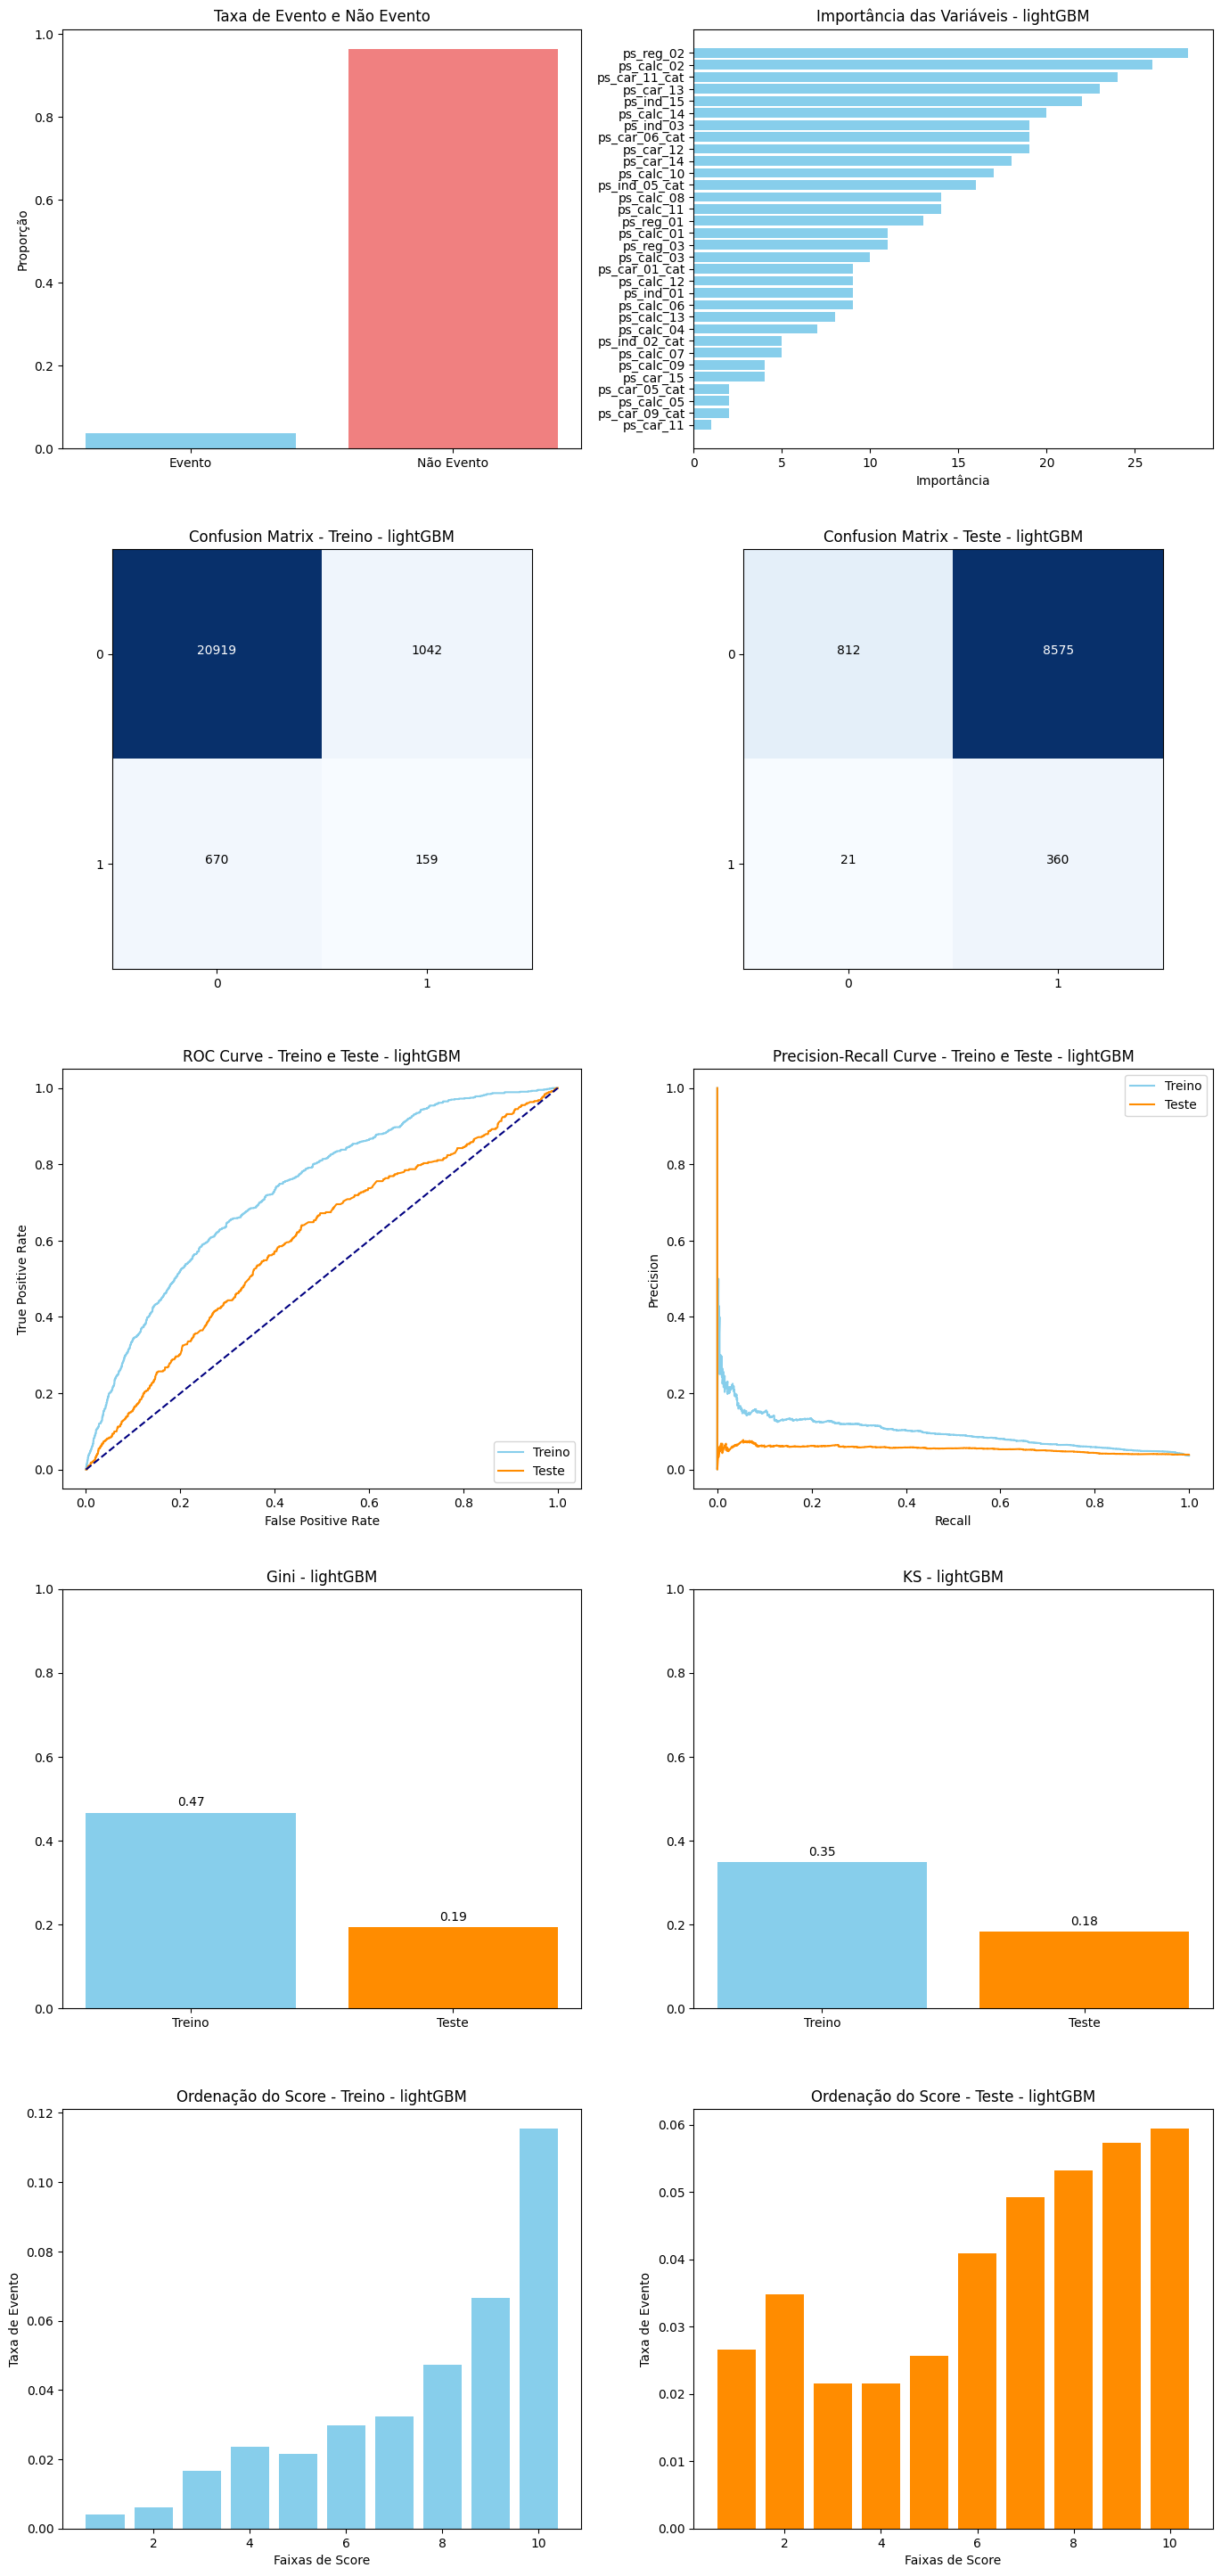

In [115]:
import itertools
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score
def calcular_ks_statistic(y_true, y_score):
    df = pd.DataFrame({'score': y_score, 'target': y_true})
    df = df.sort_values(by='score', ascending=False)
    total_events = df.target.sum()
    total_non_events = len(df) - total_events
    df['cum_events'] = df.target.cumsum()
    df['cum_non_events'] = (df.target == 0).cumsum()
    df['cum_events_percent'] = df.cum_events / total_events
    df['cum_non_events_percent'] = df.cum_non_events / total_non_events
    ks_statistic = np.abs(df.cum_events_percent - df.cum_non_events_percent).max()
    return ks_statistic

def avaliar_modelo(X_train, y_train, X_test, y_test, modelo, nm_modelo):

    feature_names = list(X_train.columns)
    # Criação da figura e dos eixos
    fig, axs = plt.subplots(5, 2, figsize=(15, 30))  # Ajustado para incluir novos gráficos
    plt.tight_layout(pad=6.0)

    # Cor azul claro
    cor = 'skyblue'

    # Taxa de Evento e Não Evento
    event_rate = np.mean(y_train)
    non_event_rate = 1 - event_rate
    axs[0, 0].bar(['Evento', 'Não Evento'], [event_rate, non_event_rate], color=[cor, 'lightcoral'])
    axs[0, 0].set_title('Taxa de Evento e Não Evento')
    axs[0, 0].set_ylabel('Proporção')

    # Importância dos Atributos
    importancias = None
    if hasattr(modelo, 'coef_'):
        importancias = np.abs(modelo.coef_[0])
    elif hasattr(modelo, 'feature_importances_'):
        importancias = modelo.feature_importances_

    if importancias is not None:
        importancias_df = pd.DataFrame({'feature': feature_names, 'importance': importancias})
        importancias_df = importancias_df.sort_values(by='importance', ascending=True)

        axs[0, 1].barh(importancias_df['feature'], importancias_df['importance'], color=cor)
        axs[0, 1].set_title('Importância das Variáveis - ' + nm_modelo)
        axs[0, 1].set_xlabel('Importância')

    else:
        axs[0, 1].axis('off')  # Desativa o subplot se não houver importâncias para mostrar

    # Confusion Matrix - Treino
    y_pred_train = modelo.predict(X_train)
    cm_train = confusion_matrix(y_train, y_pred_train)
    axs[1, 0].imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
    axs[1, 0].set_title('Confusion Matrix - Treino - ' + nm_modelo)
    axs[1, 0].set_xticks([0, 1])
    axs[1, 0].set_yticks([0, 1])
    axs[1, 0].set_xticklabels(['0', '1'])
    axs[1, 0].set_yticklabels(['0', '1'])
    thresh = cm_train.max() / 2.
    for i, j in itertools.product(range(cm_train.shape[0]), range(cm_train.shape[1])):
        axs[1, 0].text(j, i, format(cm_train[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_train[i, j] > thresh else "black")

    # Confusion Matrix - Teste
    y_pred_test = modelo.predict(X_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    axs[1, 1].imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
    axs[1, 1].set_title('Confusion Matrix - Teste - ' + nm_modelo)
    axs[1, 1].set_xticks([0, 1])
    axs[1, 1].set_yticks([0, 1])
    axs[1, 1].set_xticklabels(['0', '1'])
    axs[1, 1].set_yticklabels(['0', '1'])
    thresh = cm_test.max() / 2.
    for i, j in itertools.product(range(cm_test.shape[0]), range(cm_test.shape[1])):
        axs[1, 1].text(j, i, format(cm_test[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_test[i, j] > thresh else "black")

    # ROC Curve - Treino e Teste
    y_score_train = modelo.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_score_train)
    axs[2, 0].plot(fpr_train, tpr_train, color=cor, label='Treino')

    y_score_test = modelo.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test)
    axs[2, 0].plot(fpr_test, tpr_test, color='darkorange', label='Teste')

    axs[2, 0].plot([0, 1], [0, 1], color='navy', linestyle='--')
    axs[2, 0].set_title('ROC Curve - Treino e Teste - ' + nm_modelo)
    axs[2, 0].set_xlabel('False Positive Rate')
    axs[2, 0].set_ylabel('True Positive Rate')
    axs[2, 0].legend(loc="lower right")

    # Precision-Recall Curve - Treino e Teste
    precision_train, recall_train, _ = precision_recall_curve(y_train, y_score_train)
    axs[2, 1].plot(recall_train, precision_train, color=cor, label='Treino')

    precision_test, recall_test, _ = precision_recall_curve(y_test, y_score_test)
    axs[2, 1].plot(recall_test, precision_test, color='darkorange', label='Teste')

    axs[2, 1].set_title('Precision-Recall Curve - Treino e Teste - ' + nm_modelo)
    axs[2, 1].set_xlabel('Recall')
    axs[2, 1].set_ylabel('Precision')
    axs[2, 1].legend(loc="upper right")

    # Gini - Treino e Teste
    auc_train = roc_auc_score(y_train, y_score_train)
    gini_train = 2 * auc_train - 1
    auc_test = roc_auc_score(y_test, y_score_test)
    gini_test = 2 * auc_test - 1
    axs[3, 0].bar(['Treino', 'Teste'], [gini_train, gini_test], color=[cor, 'darkorange'])
    axs[3, 0].set_title('Gini - ' + nm_modelo)
    axs[3, 0].set_ylim(0, 1)
    axs[3, 0].text('Treino', gini_train + 0.01, f'{gini_train:.2f}', ha='center', va='bottom')
    axs[3, 0].text('Teste', gini_test + 0.01, f'{gini_test:.2f}', ha='center', va='bottom')

    # KS - Treino e Teste
    ks_train = calcular_ks_statistic(y_train, y_score_train)
    ks_test = calcular_ks_statistic(y_test, y_score_test)
    axs[3, 1].bar(['Treino', 'Teste'], [ks_train, ks_test], color=[cor, 'darkorange'])
    axs[3, 1].set_title('KS - ' + nm_modelo)
    axs[3, 1].set_ylim(0, 1)
    axs[3, 1].text('Treino', ks_train + 0.01, f'{ks_train:.2f}', ha='center', va='bottom')
    axs[3, 1].text('Teste', ks_test + 0.01, f'{ks_test:.2f}', ha='center', va='bottom')


    # Decile Analysis - Teste
    scores = modelo.predict_proba(X_test)[:, 1]
    noise = np.random.uniform(0, 0.0001, size=scores.shape)  # Adiciona um pequeno ruído
    scores += noise
    deciles = pd.qcut(scores, q=10, duplicates='drop')
    decile_analysis = y_test.groupby(deciles).mean()
    axs[4, 1].bar(range(1, len(decile_analysis) + 1), decile_analysis, color='darkorange')
    axs[4, 1].set_title('Ordenação do Score - Teste - ' + nm_modelo)
    axs[4, 1].set_xlabel('Faixas de Score')
    axs[4, 1].set_ylabel('Taxa de Evento')

    # Decile Analysis - Treino
    scores_train = modelo.predict_proba(X_train)[:, 1]
    noise = np.random.uniform(0, 0.0001, size=scores_train.shape)  # Adiciona um pequeno ruído
    scores_train += noise
    deciles_train = pd.qcut(scores_train, q=10, duplicates='drop')
    decile_analysis_train = y_train.groupby(deciles_train).mean()
    axs[4, 0].bar(range(1, len(decile_analysis_train) + 1), decile_analysis_train, color=cor)
    axs[4, 0].set_title('Ordenação do Score - Treino - ' + nm_modelo)
    axs[4, 0].set_xlabel('Faixas de Score')
    axs[4, 0].set_ylabel('Taxa de Evento')

    # Mostrar os gráficos
    plt.show()
avaliar_modelo(x_train_feat, y_train, X_test_feat, y_test, best_model_dt,nm_modelo='lightGBM')

implantação


In [116]:
test_kaggle = pd.read_csv('/content/test.csv')
test_kaggle.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [124]:
test_kaggle_1 = test_kaggle.drop('id',axis=1)

test_kaggle_1.shape

(892816, 57)

In [125]:
with open('/content/prd_drop_nullvars_a014.pkl', 'rb') as f:
    loaded_drop_null_feat = pickle.load(f)
loaded_drop_null_feat

['ps_car_03_cat']

In [126]:
test_kaggle_d = test_kaggle_1.drop(loaded_drop_null_feat,axis=1)
test_kaggle_d.shape


(892816, 56)

In [127]:
with open('/content/prd_fillna_a014.pkl', 'rb') as f:
  loaded_means = pickle.load(f)


In [129]:
def pod_custom_fillna_prod(df, means):
  df.replace(-1, np.nan, inplace=True)
  for col, mean_value in means.items():
      df[col].fillna(mean_value, inplace=True)

  categorical_cols = df.select_dtypes(include=['object']).columns
  df[categorical_cols] = df[categorical_cols].fillna('POD_VERIFICAR')

  return df

# Aplicar imputação de nulos na base de treino
test_kaggle_d_fill = pod_custom_fillna_prod(test_kaggle_d,loaded_means)

test_kaggle_d_fill.shape

(892816, 56)

In [131]:
# Carregar o scaler
with open('/content/prd_scaler_a014.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Aplicando na base de treino
np_scaled = loaded_scaler.transform(test_kaggle_d_fill)
test_kag_d_fill_scal = pd.DataFrame(np_scaled, columns=test_kaggle_d_fill.columns, index=test_kaggle_d_fill.index)
test_kag_d_fill_scal.shape

(892816, 56)

In [137]:
# Carregar lista de variáveis que passaram pelo Feature Sepection (utilizadas no treinamento do modelo)
with open('/content/prd_list_features_a014.pkl', 'rb') as f:
    loaded_features = pickle.load(f)
len(loaded_features)


32

In [146]:
test_kag_d_fill_scal_feat = test_kag_d_fill_scal[loaded_features]
test_kag_d_fill_scal_feat.shape

(892816, 32)

In [147]:
# Carregando modelo campeão

with open('/content/best_model_lightgbm.pkl', 'rb') as f:
  loaded_model = pickle.load(f)

loaded_model

LGBMClassifier(lambda_l1=0, lambda_l2=0, max_depth=3, min_data_in_leaf=2,
               num_leaves=5, random_state=42, reg_alpha=0.1)

In [148]:
predprob = loaded_model.predict_proba(test_kag_d_fill_scal_feat)
predict = loaded_model.predict(test_kag_d_fill_scal_feat)
test_kag_d_fill_scal_feat['score_1']=predprob[:,1]
test_kag_d_fill_scal_feat['class']=predict
test_kag_d_fill_scal_feat.shape

[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0


<ipython-input-148-eb9cd5808457>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_kag_d_fill_scal_feat['score_1']=predprob[:,1]
<ipython-input-148-eb9cd5808457>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_kag_d_fill_scal_feat['class']=predict


(892816, 34)

In [150]:
test_kag_d_fill_scal_feat_scor = test_kag_d_fill_scal_feat.merge(test_kaggle['id'], left_index=True, right_index=True, how='inner')
test_kag_d_fill_scal_feat_scor.shape


(892816, 35)

In [151]:
generate_metadata(test_kag_d_fill_scal_feat_scor)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,id,int64,0,0.0,892816
1,class,int64,0,0.0,2
2,ps_ind_02_cat,float64,0,0.0,5
3,ps_car_05_cat,float64,0,0.0,3
4,ps_car_11,float64,0,0.0,5
5,ps_car_09_cat,float64,0,0.0,6
6,ps_ind_05_cat,float64,0,0.0,8
7,ps_ind_01,float64,0,0.0,8
8,ps_car_12,float64,0,0.0,201
9,ps_car_01_cat,float64,0,0.0,13


In [152]:
abt_envio_kaggle = test_kag_d_fill_scal_feat_scor[['id','score_1']]
abt_envio_kaggle.rename(columns={'score_1':'target'},inplace=True)
abt_envio_kaggle.head()

<ipython-input-152-338ce543ec03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abt_envio_kaggle.rename(columns={'score_1':'target'},inplace=True)


,id,target
0,0,0.418070
1,1,0.491847
2,2,0.518433
3,3,0.271099
4,4,0.454382


In [153]:
abt_envio_kaggle.to_csv('/content/abt_scored_002.csv', index=False)